In [6]:
import pandas as pd 

In [7]:
tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0)
albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0)
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)

In [8]:
#correlation threshold?

## Filter Tracks DF

In [9]:
tracks.corrwith(tracks["popularity"]).abs().sort_values()

C:\Users\mundt\AppData\Local\Temp\ipykernel_23824\2920250553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tracks.corrwith(tracks["popularity"]).abs().sort_values()


key                 0.000641
mode                0.010003
valence             0.034412
instrumentalness    0.041537
disc_number         0.047331
liveness            0.059116
tempo               0.061869
danceability        0.092382
time_signature      0.121505
track_number        0.139460
energy              0.153979
acousticness        0.154408
duration_ms         0.169125
loudness            0.239679
speechiness         0.304212
popularity          1.000000
dtype: float64

In [10]:
len(tracks)

101939

In [11]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [12]:
#rename id to track_id
tracks.rename(columns={'id': 'track_id'},inplace=True)

In [58]:
include_col_tracks = ["track_id","time_signature","track_number","energy","acousticness","duration_ms","loudness","speechiness","popularity", "album_id", "artists_id"]      

In [59]:
len(include_col_tracks)

11

In [60]:
tracks_filtered = tracks[include_col_tracks]
tracks_filtered.columns

Index(['track_id', 'time_signature', 'track_number', 'energy', 'acousticness',
       'duration_ms', 'loudness', 'speechiness', 'popularity', 'album_id',
       'artists_id'],
      dtype='object')

## Filter albums DF

In [61]:
albums.columns

Index(['album_type', 'artist_id', 'available_markets', 'external_urls', 'href',
       'album_id', 'images', 'name', 'release_date', 'release_date_precision',
       'total_tracks', 'track_id', 'track_name_prev', 'uri', 'type'],
      dtype='object')

In [62]:
albums.rename(columns={'id': 'album_id'},inplace=True)

In [76]:
#albums_tracks = tracks.merge(albums,left_on="track_id",right_on="track_id",how="left")
#join on album_id works better
albums_tracks = tracks.merge(albums,left_on="album_id",right_on="album_id", how="left")
albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()

C:\Users\mundt\AppData\Local\Temp\ipykernel_23824\2581811509.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()


key                 0.000641
mode                0.010003
valence             0.034412
instrumentalness    0.041537
disc_number         0.047331
liveness            0.059116
tempo               0.061869
danceability        0.092382
time_signature      0.121505
total_tracks        0.132356
track_number        0.139460
energy              0.153979
acousticness        0.154408
duration_ms         0.169125
loudness            0.239679
speechiness         0.304212
popularity          1.000000
dtype: float64

In [77]:
albums_tracks.isna().sum()

acousticness              0
album_id                  0
analysis_url              0
artists_id                0
available_markets_x       0
country                   0
danceability              0
disc_number               0
duration_ms               0
energy                    0
href_x                    0
track_id_x                0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
lyrics                    0
mode                      0
name_x                    0
playlist                  0
popularity                0
preview_url               0
speechiness               0
tempo                     0
time_signature            0
track_href                0
track_name_prev_x         0
track_number              0
uri_x                     0
valence                   0
type_x                    0
album_type                0
artist_id                 0
available_markets_y       0
external_urls             0
href_y              

In [65]:
albums_include = ['album_type', 'artist_id', 'available_markets','total_tracks', 'track_id', 'track_name_prev','release_date',"album_id"]

In [66]:
len(albums_include)

8

In [67]:
albums_filtered = albums[albums_include]
albums_filtered.columns

Index(['album_type', 'artist_id', 'available_markets', 'total_tracks',
       'track_id', 'track_name_prev', 'release_date', 'album_id'],
      dtype='object')

In [78]:
#albums_tracks = tracks_filtered.merge(albums_filtered,left_on="track_id",right_on="track_id",how="left")
albums_tracks = tracks_filtered.merge(albums_filtered,left_on="album_id",right_on="album_id", how="left")
albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()

C:\Users\mundt\AppData\Local\Temp\ipykernel_23824\335101616.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  albums_tracks.corrwith(albums_tracks["popularity"]).abs().sort_values()


time_signature    0.121505
total_tracks      0.132356
track_number      0.139460
energy            0.153979
acousticness      0.154408
duration_ms       0.169125
loudness          0.239679
speechiness       0.304212
popularity        1.000000
dtype: float64

In [79]:
albums_tracks.isna().sum()

track_id_x           0
time_signature       0
track_number         0
energy               0
acousticness         0
duration_ms          0
loudness             0
speechiness          0
popularity           0
album_id             0
artists_id           0
album_type           0
artist_id            0
available_markets    0
total_tracks         0
track_id_y           0
track_name_prev      0
release_date         0
dtype: int64

## Artists Filter DF

In [80]:
artists.head()
artists.rename(columns={"id": "artist_id_artists"},inplace=True)
artists.columns

Index(['artist_popularity', 'followers', 'genres', 'artist_id_artists', 'name',
       'track_id', 'track_name_prev', 'type'],
      dtype='object')

## Merge albums, tracks, artists

In [81]:
albums_tracks_artistis = albums_tracks.merge(artists, left_on="artist_id",right_on="artist_id_artists",how="left")

In [82]:
albums_tracks_artistis.isna().sum()

track_id_x             0
time_signature         0
track_number           0
energy                 0
acousticness           0
duration_ms            0
loudness               0
speechiness            0
popularity             0
album_id               0
artists_id             0
album_type             0
artist_id              0
available_markets      0
total_tracks           0
track_id_y             0
track_name_prev_x      0
release_date           0
artist_popularity    795
followers            795
genres               795
artist_id_artists    795
name                 795
track_id             795
track_name_prev_y    795
type                 795
dtype: int64

In [71]:
albums_tracks_artistis.columns

Index(['track_id_x', 'time_signature', 'track_number', 'energy',
       'acousticness', 'duration_ms', 'loudness', 'speechiness', 'popularity',
       'album_id_x', 'artists_id', 'album_type', 'artist_id',
       'available_markets', 'total_tracks', 'track_name_prev_x',
       'release_date', 'album_id_y', 'artist_popularity', 'followers',
       'genres', 'artist_id_artists', 'name', 'track_id_y',
       'track_name_prev_y', 'type'],
      dtype='object')

In [72]:
print("number of rows in merged: ",(len(albums_tracks_artistis.columns)))

number of rows in merged:  26


In [73]:
print("number of rows in merged: ",(len(albums_tracks_artistis)))

number of rows in merged:  101939


## Lyrics

In [30]:
lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

In [31]:
lyrics_features.columns

Index(['mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [32]:
albums_tracks_artistis_lyr = albums_tracks_artistis.merge(lyrics_features,left_on="track_id",right_on="track_id",how="left")

In [33]:
albums_tracks_artistis.isnull().sum()

track_id                 0
time_signature           0
track_number             0
energy                   0
acousticness             0
duration_ms              0
loudness                 0
speechiness              0
popularity               0
album_type           26973
artist_id            26973
available_markets    26973
total_tracks         26973
track_name_prev_x    26973
release_date         26973
album_id             26973
artist_popularity    57047
followers            57047
genres               57047
artist_id_artists    57047
name                 57048
track_name_prev_y    57047
type                 57047
dtype: int64

In [34]:
print(len(albums_tracks_artistis_lyr.columns))

29


In [35]:
print(len(albums_tracks_artistis_lyr))

113173


In [36]:
albums_tracks_artistis_lyr.isna().sum()

track_id                   0
time_signature             0
track_number               0
energy                     0
acousticness               0
duration_ms                0
loudness                   0
speechiness                0
popularity                 0
album_type             26973
artist_id              26973
available_markets      26973
total_tracks           26973
track_name_prev_x      26973
release_date           26973
album_id               26973
artist_popularity      57047
followers              57047
genres                 57047
artist_id_artists      57047
name                   57048
track_name_prev_y      57047
type                   57047
mean_syllables_word     7951
mean_words_sentence     7951
n_sentences             7951
n_words                 7951
sentence_similarity     7951
vocabulary_wealth       7951
dtype: int64

## AUDIO

In [37]:
audio_features = pd.read_csv('SpotGenTrack/Features Extracted/low_level_audio_features.csv', index_col = 0)
audio_features.head()

,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,...,Tonnetz_4,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min,track_id
0,0.438296,0.472769,0.427441,0.436688,0.467697,0.493862,0.512244,0.568658,0.560524,0.513068,...,0.018434,-0.001759,-0.006392,0.067966,-89.113389,2564.247669,3558.400706,4508.506071,367.831109,19YEk4OVQZn3GfoxbpNrU6
1,0.596605,0.368288,0.285263,0.302211,0.905805,0.510909,0.221708,0.311248,0.491277,0.416469,...,0.046941,0.005665,-0.026928,0.047308,-127.945239,2370.181495,1499.689590,3647.394611,230.165275,6zJms3MX11Qu1IKF44LoRW
2,0.505224,0.500420,0.506773,0.488258,0.498356,0.573582,0.690761,0.742858,0.686282,0.657118,...,-0.006929,0.004968,0.008947,0.058463,-238.285176,2973.294736,1543.550034,5623.349330,187.290534,1WugzepXsLjnsM0K4UaWYc
3,0.525690,0.666469,0.579492,0.498920,0.598528,0.631578,0.501693,0.500468,0.587101,0.546499,...,-0.027382,-0.009689,0.001402,0.080547,-148.785733,2716.749483,3017.248824,5799.931595,160.940693,1pSlTbCrUJ9rmwj5CNNrX4
4,0.632214,0.503698,0.496942,0.611532,0.634613,0.697265,0.557012,0.530836,0.444279,0.466659,...,0.003728,-0.002780,-0.010120,0.084945,-176.618314,3096.692876,2118.686992,6560.018666,229.131948,5yruvWJs3mL00w4slpCVzN


In [38]:
albums_tracks_artistis_lyr_audio = albums_tracks_artistis_lyr.merge(audio_features,on="track_id",how="left")

## ALL data DF

In [39]:
len(albums_tracks_artistis_lyr_audio)

113173

In [40]:
albums_tracks_artistis_lyr_audio.shape

(113173, 236)

In [41]:
albums_tracks_artistis_lyr_audio.isna().sum().sort_values(ascending=False)[:20]

name                   57048
artist_popularity      57047
type                   57047
followers              57047
artist_id_artists      57047
track_name_prev_y      57047
genres                 57047
artist_id              26973
available_markets      26973
total_tracks           26973
track_name_prev_x      26973
release_date           26973
album_id               26973
album_type             26973
mean_words_sentence     7951
n_sentences             7951
n_words                 7951
sentence_similarity     7951
vocabulary_wealth       7951
mean_syllables_word     7951
dtype: int64

In [42]:
all_data = albums_tracks_artistis_lyr_audio
all_data.shape

(113173, 236)

In [43]:
all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)

C:\Users\mundt\AppData\Local\Temp\ipykernel_23824\2376672832.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)


popularity             1.000000
artist_popularity      0.763236
MFCC_1                 0.320448
entropy_energy         0.279560
speechiness            0.276684
                         ...   
ZCR                    0.005478
Chroma_6               0.003946
Spectral_contrast_3    0.002238
Chroma_7               0.000791
MFCC_20                0.000023
Length: 224, dtype: float64

In [44]:
all_data["artist_popularity"].isna().sum()

57047

## Analysis of popularity

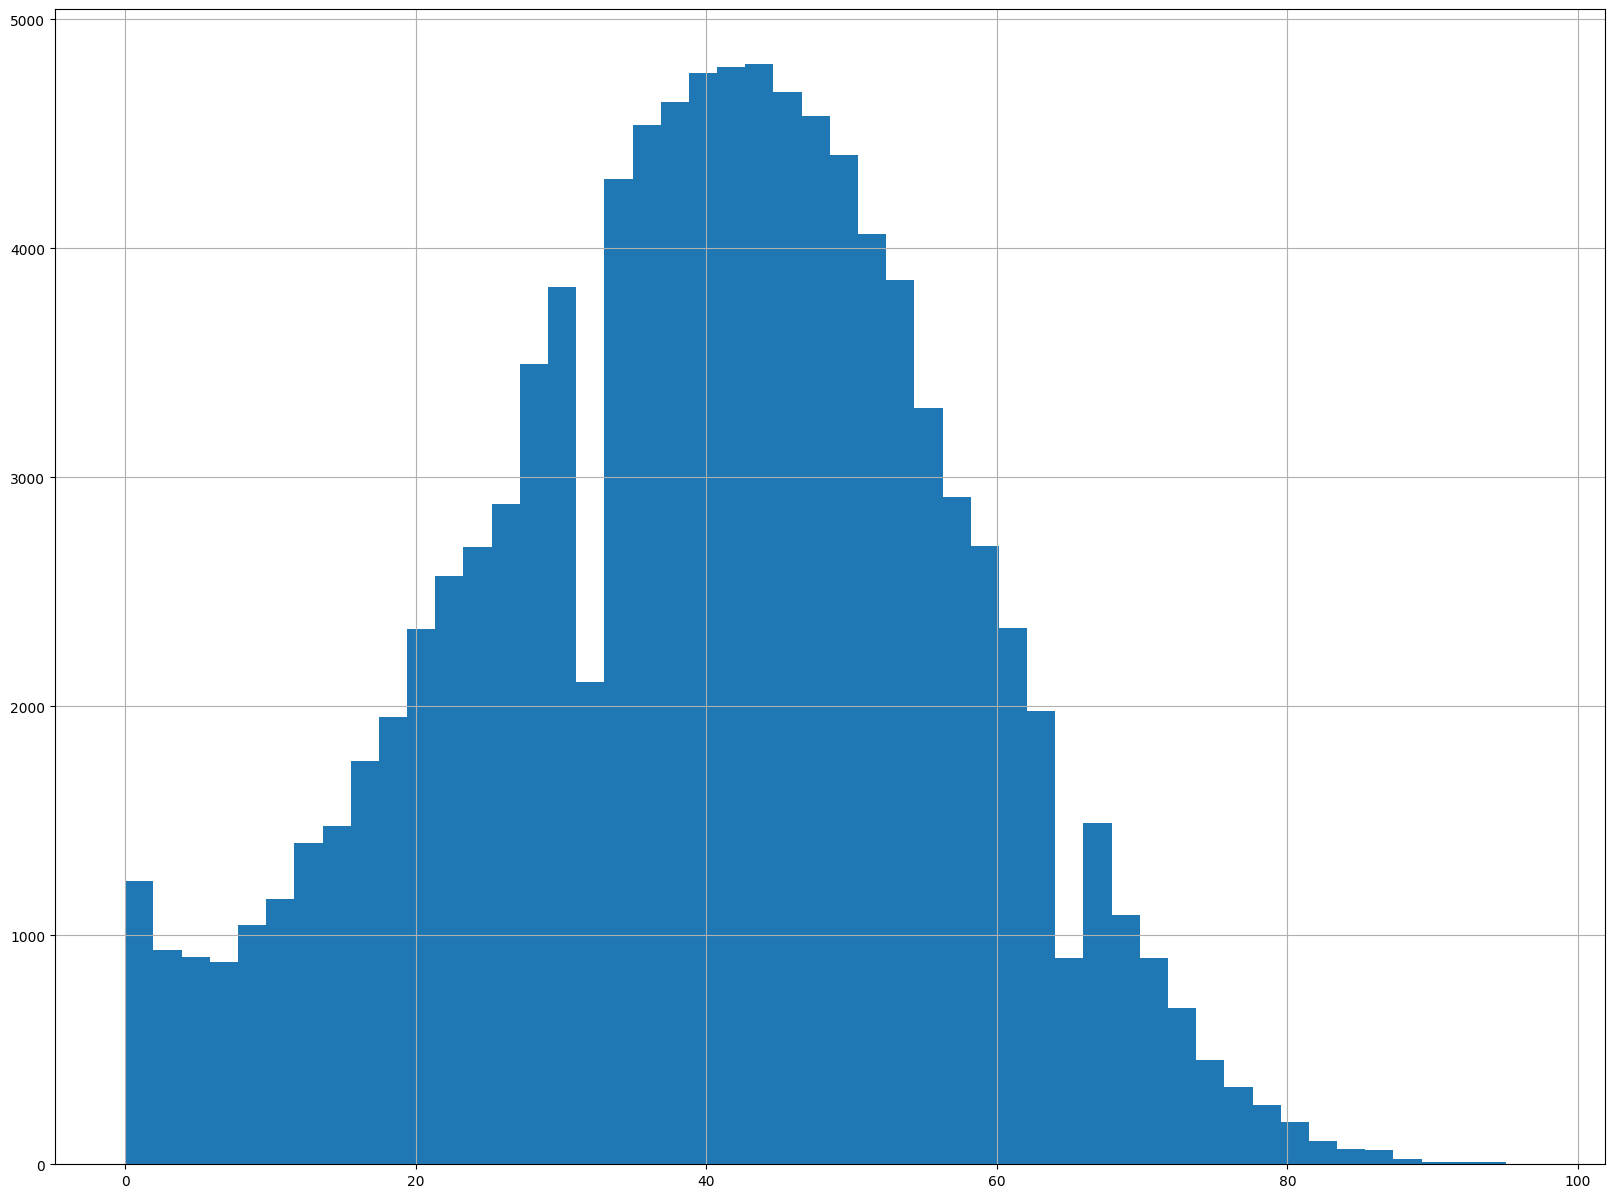

In [45]:
import matplotlib.pyplot as plt


tracks["popularity"].hist(bins=50, figsize=(20,15))

plt.show()

In [46]:
tracks.sort_values(by="popularity",ascending=False)["name"][:20]

90024                                       Calma - Remix
101706                                   Sweet but Psycho
100168                            Going Bad (feat. Drake)
100625                                               Talk
94579                                     i'm so tired...
101732                                  MIA (feat. Drake)
94452                                          High Hopes
89186                         Giant (with Rag'n'Bone Man)
100383                                         Adan y Eva
89648                                   Baila Baila Baila
86219                                   Murder On My Mind
91256                                          SICKO MODE
92713                                  Let Me Down Slowly
92734                                           Please Me
93924                  ZEZE (feat. Travis Scott & Offset)
93012                                               a lot
74129                                            Thotiana
90029         

In [47]:
#outliers in label
from scipy.stats import zscore
z_scores = zscore(all_data_sources['popularity'])
potential_outliers = all_data_sources[(z_scores > 3) | (z_scores < -3)]
potential_outliers[["name_track","popularity"]]

NameError: name 'all_data_sources' is not defined

## prepro pipeline

#notes for pipeline:
- train model with train data 
- Include categorical columns of track df
- Include hanna’s version of audio features df 
- Drop track id before transforming
- After scaling correlations super low- Imputer strategy for artist_popularity 


In [ ]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [ ]:
#define features and labels 
X = all_data.drop(columns=["popularity"])
y = all_data["popularity"]

In [ ]:
#train test split 
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)

In [ ]:
train_data.shape

(90538, 236)

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

    
def get_preprocessor(data):
    
    num_attribs = data.select_dtypes(include=['float64', 'int64']).columns
    cat_attribs = data.select_dtypes(include=['object']).columns
    
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])
    
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse=False)),
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
    
    return full_pipeline

In [ ]:
preprocessor = get_preprocessor(train_data)

In [ ]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

In [ ]:
data_prepared = preprocessor.fit_transform(train_data[:500])
#for x in data_prepared:
#    print(len(x))
#now 4700 columns

/Users/lauraweil/opt/anaconda3/envs/exam/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_prepared.shape

(500, 2620)

## Check for correlations with (encoded) features

In [ ]:
# Get the original column names
num_attribs = list(all_data.select_dtypes(include=['float64', 'int64']).columns)
cat_attribs = list(all_data.select_dtypes(include=['object']).columns)

# Get the transformed column names
transformed_num_cols = preprocessor.transformers_[0][2].tolist()
transformed_cat_cols = list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

# Create a mapping of transformed column names to original column names
transformed_cols = transformed_num_cols + transformed_cat_cols
orig_cols_expanded = []

for col in all_data.columns:
    if col in cat_attribs:
        one_hot_cols = [t_col for t_col in transformed_cat_cols if t_col.startswith(col + "_")]
        orig_cols_expanded.extend([col] * len(one_hot_cols))
    else:
        orig_cols_expanded.append(col)

col_mapping = dict(zip(transformed_cols, orig_cols_expanded))

# Create the correlation matrix
corr_matrix = pd.DataFrame(data_prepared, columns=transformed_cols).corr()

# Rename the columns of the correlation matrix using the original column names
corr_matrix.rename(columns=col_mapping, index=col_mapping, inplace=True)

# Print the correlation matrix
print(corr_matrix)

                      track_id  track_id  track_id  track_id  track_id  \
track_id              1.000000  0.056007  0.137474 -0.150128  0.002654   
track_id              0.056007  1.000000 -0.198478  0.163894 -0.074346   
track_id              0.137474 -0.198478  1.000000 -0.771686 -0.176444   
track_id             -0.150128  0.163894 -0.771686  1.000000  0.077491   
track_id              0.002654 -0.074346 -0.176444  0.077491  1.000000   
...                        ...       ...       ...       ...       ...   
entropy_energy        0.056299 -0.014153 -0.012759  0.017213 -0.015249   
spectral_bandwith     0.008331 -0.023066  0.038572 -0.027432 -0.014655   
spectral_centroid     0.016877  0.048398 -0.059518  0.058954 -0.002867   
spectral_rollOff_max -0.016877 -0.048398  0.059518 -0.058954  0.002867   
spectral_rollOff_min  0.016877  0.048398 -0.059518  0.058954 -0.002867   

                      track_id  track_id  track_id  track_id  track_id  ...  \
track_id              0.135167  

In [ ]:
corr_matrix["popularity"].abs().sort_values(ascending=False)

popularity    1.000000
track_id      0.128021
track_id      0.120401
track_id      0.100169
track_id      0.085307
                ...   
track_id      0.000570
track_id      0.000464
track_id      0.000358
track_id      0.000130
track_id      0.000093
Name: popularity, Length: 2620, dtype: float64

In [ ]:
# This correlation is super low?? I think the imputing fucked up the correlations, we need to check
corr_matrix.loc['popularity', 'artist_popularity']

-0.002004008016032065